## Bike Sharing Assignment

### Introduction

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market.

### Objective

The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands.
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.

### Reading and Understanding the data

#### Importing Required Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import KFold
from scipy import stats
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

#### Reading dataset

In [4]:
excel_file_path = 'day.xlsx'
data = pd.read_excel(excel_file_path,header=0)

In [5]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01 00:00:00,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01 00:00:00,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01 00:00:00,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01 00:00:00,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01 00:00:00,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
data.shape

(730, 16)

In [7]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Data Cleaning

##### Dropping Extra Columns

In [8]:
columns_to_drop = ["instant", "dteday", "casual", "registered"]
data = data.drop(columns=columns_to_drop)

In [9]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


##### Checking for Null Values

In [10]:
data.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

##### Relacing numerical values in categorical variables

1. Season

In [11]:
replacement_dict = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}

In [12]:
data['season'] = data['season'].replace(replacement_dict)

2. Weathersit

In [13]:
replacement_dict = {1: 'Clear', 2: 'Cloudy', 3: 'Light Rain', 4: 'Heavy Rain'}

In [14]:
data['weathersit'] = data['weathersit'].replace(replacement_dict)

##### One hot encoding for categorical variables

In [15]:
encoder = OneHotEncoder(sparse=False, drop='first') 

In [16]:
encoded_categories = encoder.fit_transform(data[['season', 'mnth', 'weekday', 'weathersit']])

In [17]:
encoded_df = pd.DataFrame(encoded_categories, columns=encoder.get_feature_names_out(['season', 'mnth', 'weekday', 'weathersit']))

In [18]:
data = pd.concat([data, encoded_df], axis=1)

In [19]:
data.drop(columns=['season', 'mnth', 'weekday', 'weathersit'], inplace=True)

In [20]:
data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Cloudy,weathersit_Light Rain
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [21]:
print(data)

     yr  holiday  workingday       temp     atemp      hum  windspeed   cnt  \
0     0        0           0  14.110847  18.18125  80.5833  10.749882   985   
1     0        0           0  14.902598  17.68695  69.6087  16.652113   801   
2     0        0           1   8.050924   9.47025  43.7273  16.636703  1349   
3     0        0           1   8.200000  10.60610  59.0435  10.739832  1562   
4     0        0           1   9.305237  11.46350  43.6957  12.522300  1600   
..   ..      ...         ...        ...       ...      ...        ...   ...   
725   1        0           1  10.420847  11.33210  65.2917  23.458911  2114   
726   1        0           1  10.386653  12.75230  59.0000  10.416557  3095   
727   1        0           0  10.386653  12.12000  75.2917   8.333661  1341   
728   1        0           0  10.489153  11.58500  48.3333  23.500518  1796   
729   1        0           1   8.849153  11.17435  57.7500  10.374682  2729   

     season_Spring  season_Summer  ...  mnth_11  mn

### Preparing the data for modelling

#### Splitting the data into test and train

In [22]:
df_train, df_test = train_test_split(data, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


#### Rescaling the features

In [23]:
scaler = MinMaxScaler()
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Cloudy,weathersit_Light Rain
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


### Training the Model

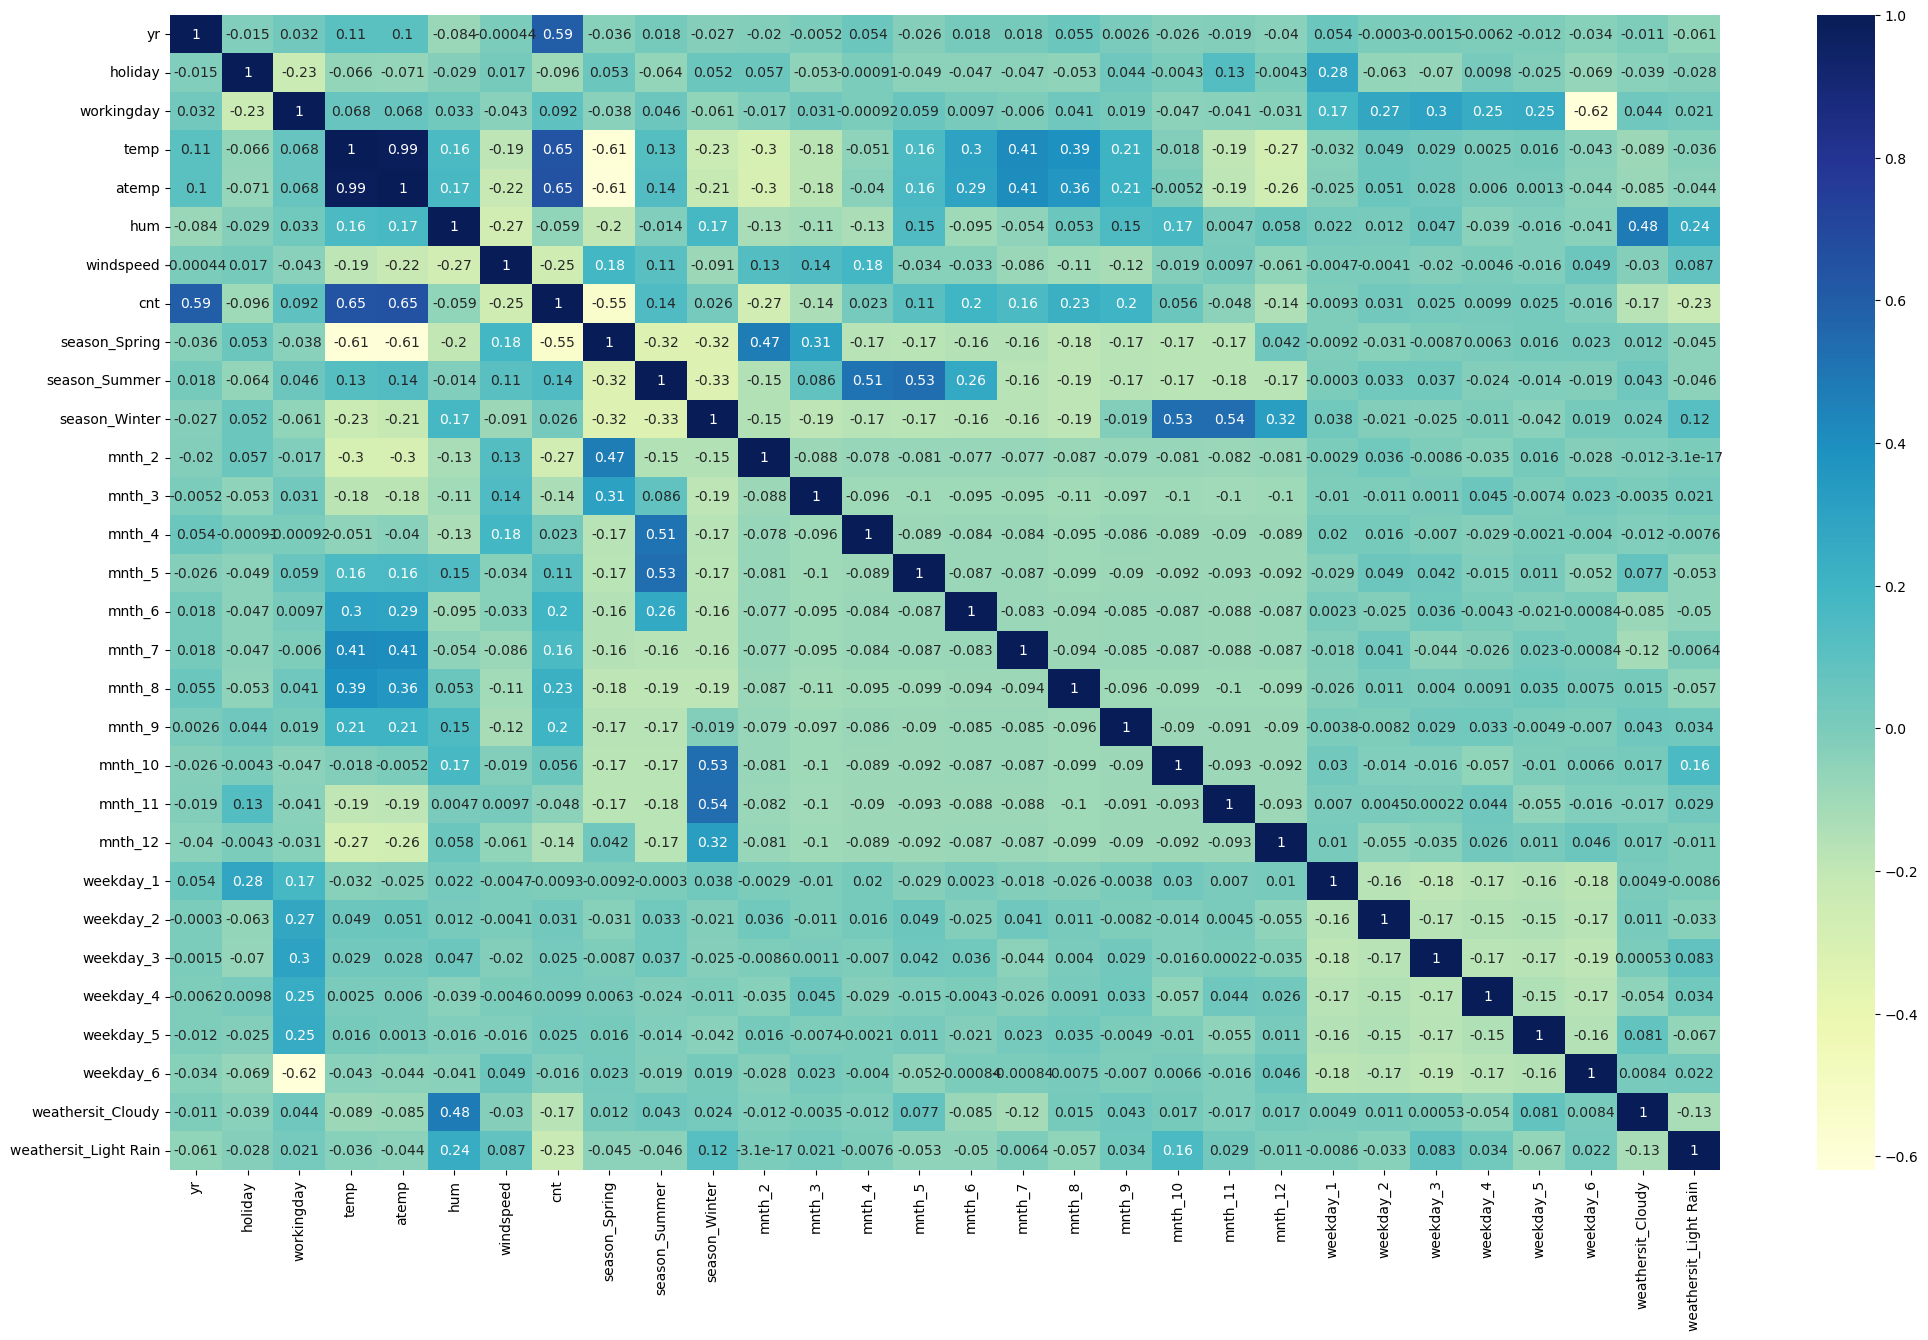

In [24]:
# heatmap to fing correlations between variables
plt.figure(figsize = (25,15))
sns.heatmap(df_train.corr(), annot=True, cmap="YlGnBu")
plt.show()

#### RFE

In [25]:
y_train = df_train['cnt']
x_train = df_train.drop('cnt', axis=1)

In [26]:
lm = LinearRegression()
rfe = RFE(lm,n_features_to_select=10)
rfe = rfe.fit(x_train, y_train)

In [27]:
list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 9),
 ('temp', True, 1),
 ('atemp', False, 11),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', False, 10),
 ('season_Winter', True, 1),
 ('mnth_2', False, 12),
 ('mnth_3', False, 3),
 ('mnth_4', False, 4),
 ('mnth_5', False, 2),
 ('mnth_6', False, 5),
 ('mnth_7', False, 13),
 ('mnth_8', False, 6),
 ('mnth_9', True, 1),
 ('mnth_10', False, 7),
 ('mnth_11', False, 14),
 ('mnth_12', False, 15),
 ('weekday_1', False, 16),
 ('weekday_2', False, 17),
 ('weekday_3', False, 19),
 ('weekday_4', False, 20),
 ('weekday_5', False, 18),
 ('weekday_6', False, 8),
 ('weathersit_Cloudy', True, 1),
 ('weathersit_Light Rain', True, 1)]

In [28]:
col = x_train.columns[rfe.support_]

In [29]:
# columns which RFE select
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_Spring',
       'season_Winter', 'mnth_9', 'weathersit_Cloudy',
       'weathersit_Light Rain'],
      dtype='object')

In [30]:
# columns which RFE did not select
x_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'season_Summer', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_10', 'mnth_11', 'mnth_12',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6'],
      dtype='object')

#### Building the model using statsmodel, for detailed statistics

In [31]:
x_train_rfe = x_train[col]

In [32]:
x_train_rfe = sm.add_constant(x_train_rfe)

In [33]:
# Running the linear model
lm = sm.OLS(y_train, x_train_rfe).fit()

In [34]:
# Summary of linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     245.2
Date:                Sun, 15 Oct 2023   Prob (F-statistic):          2.08e-185
Time:                        23:25:51   Log-Likelihood:                 492.12
No. Observations:                 510   AIC:                            -962.2
Df Residuals:                     499   BIC:                            -915.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.34

In [35]:
x_train_new = x_train_rfe.drop(['const'], axis=1)

In [36]:
# VIF calculation
vif = pd.DataFrame()
x = x_train_new
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,21.67
2,temp,13.06
4,windspeed,3.98
5,season_Spring,2.52
8,weathersit_Cloudy,2.24
6,season_Winter,2.08
0,yr,2.05
9,weathersit_Light Rain,1.20
7,mnth_9,1.16
1,holiday,1.04


#### Dropping column with high p value and VIF and building the model again

In [37]:
x_train_new = x_train_new.drop('hum', axis='columns')

In [38]:
x_train_lm = sm.add_constant(x_train_new)
lm = sm.OLS(y_train, x_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     264.4
Date:                Sun, 15 Oct 2023   Prob (F-statistic):          9.17e-184
Time:                        23:25:53   Log-Likelihood:                 485.35
No. Observations:                 510   AIC:                            -950.7
Df Residuals:                     500   BIC:                            -908.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.26

In [39]:
# VIF calculation
vif = pd.DataFrame()
x = x_train_new
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,3.94
2,temp,3.75
0,yr,2.05
4,season_Spring,1.64
7,weathersit_Cloudy,1.50
5,season_Winter,1.36
6,mnth_9,1.16
8,weathersit_Light Rain,1.08
1,holiday,1.04


#### Residual Analysis

In [40]:
y_train_pred = lm.predict(x_train_lm)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


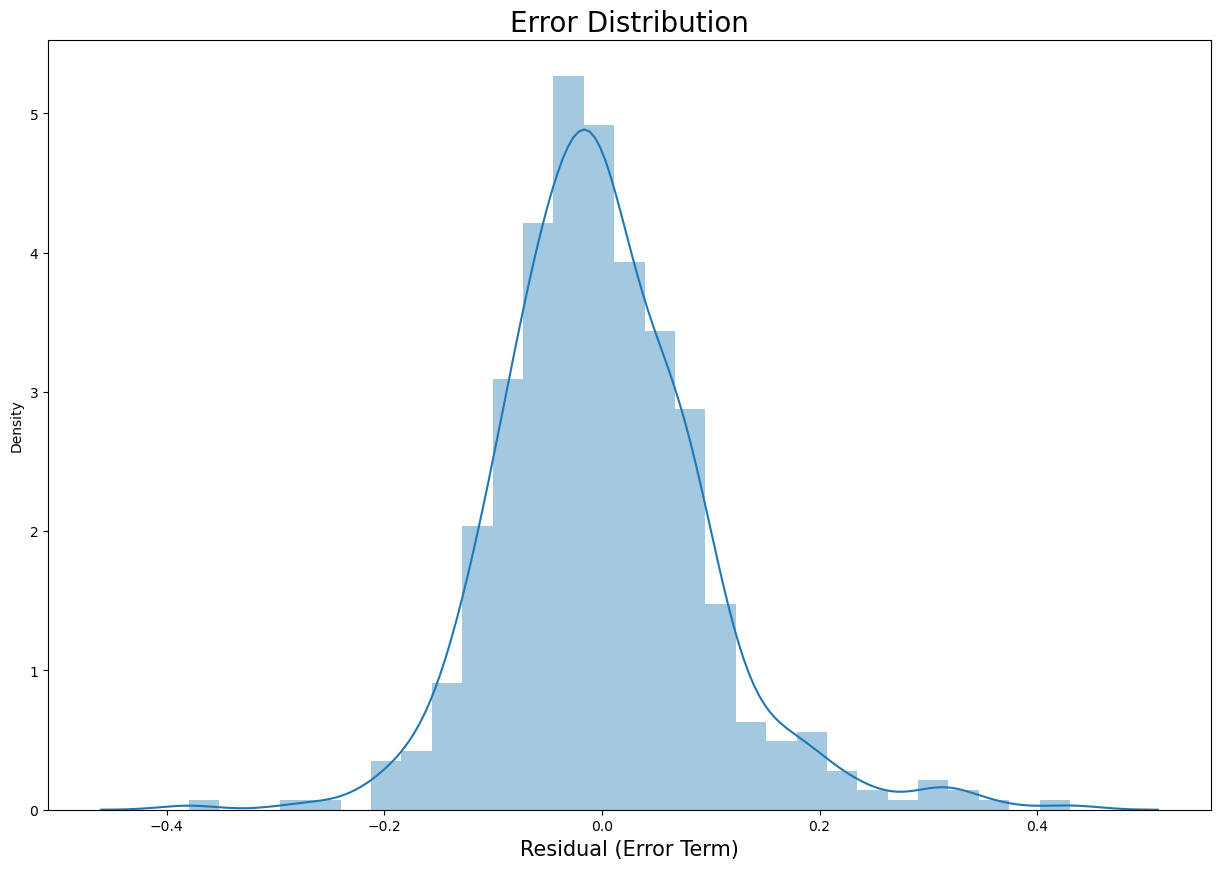

In [41]:
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
residual = y_train_pred - y_train
plt.xlabel('Residual (Error Term)', fontdict={'fontsize': 15})
plt.title('Error Distribution', fontdict={'fontsize': 20})
sns.distplot(residual,ax=ax)
plt.show()

Distribution is centered around 0 and looking normal

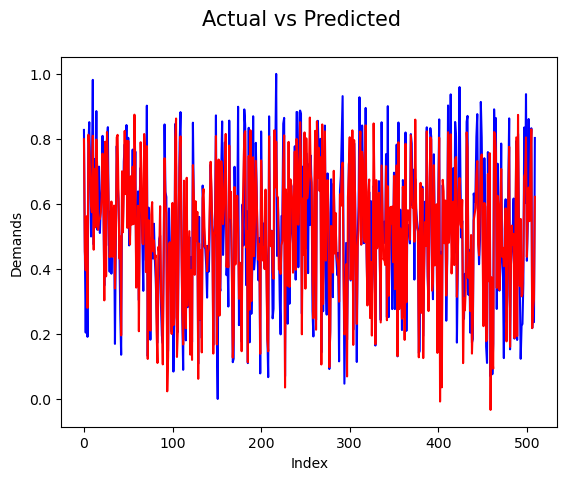

In [43]:
# Actual vs Predicted
c = [i for i in range(0,len(x_train_new),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

Actual and Predicted result follow almost the same pattern

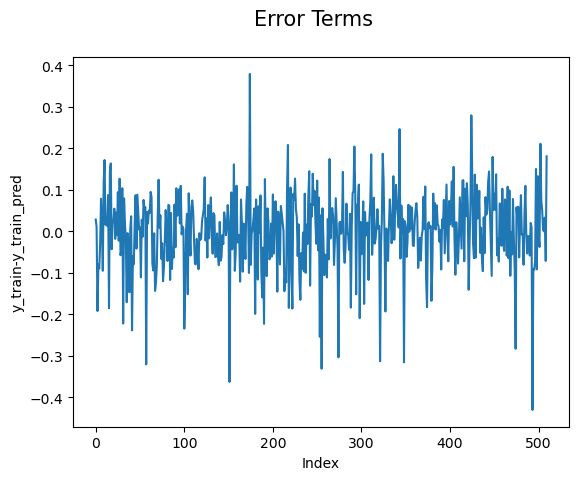

In [44]:
# Error Terms
c = [i for i in range(0,len(x_train_new),1)]
plt.plot(c,y_train-y_train_pred)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

Error terms are independent of each other

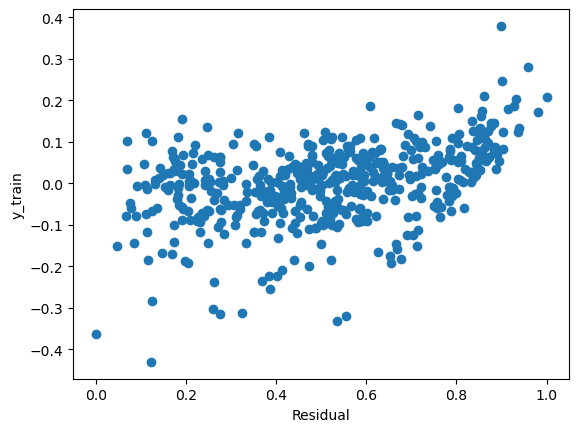

In [45]:
# scatter plot for linearity check
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

Text(0, 0.5, 'y_train_pred')

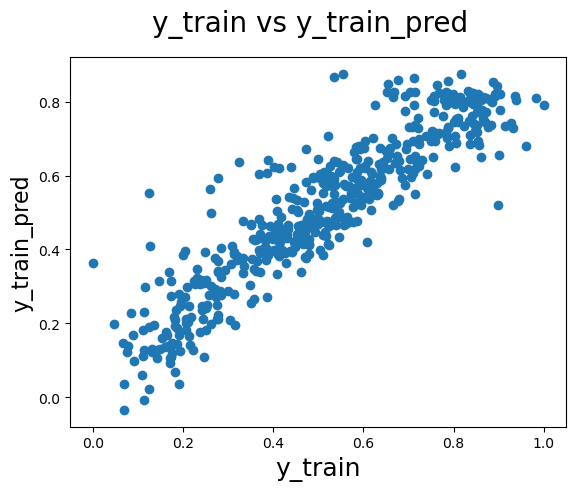

In [46]:
# Homoscedacity

fig = plt.figure()
plt.scatter(y_train, y_train_pred)
fig.suptitle('y_train vs y_train_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_train', fontsize = 18)                          # X-label
plt.ylabel('y_train_pred', fontsize = 16)

We can observe that variance of the residuals (error terms) is constant across predictions. i.e error term does not vary much as the value of the predictor variable changes.

#### Checking on test data

In [47]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Cloudy,weathersit_Light Rain
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
299,0,0,1,19.270000,22.85230,81.2917,13.250121,2659,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
152,0,0,1,29.315000,32.19710,30.5000,19.583229,4968,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [48]:
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Cloudy,weathersit_Light Rain
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [49]:
y_test = df_test.pop('cnt')

In [50]:
x_test = df_test

In [51]:
x_test_new = x_test[x_train_new.columns]
x_test_new = sm.add_constant(x_test_new)

In [52]:
y_test_pred = lm.predict(x_test_new)

In [53]:
r2_score(y_true=y_test, y_pred = y_test_pred)

0.8045486380321802

As both test and traing R square has not much of a difference thus the model is neither underfitted nor overfitted

### Final Model Interpretation For Linear Regrssion Assumptions

In [54]:
lm.params

const                    0.268395
yr                       0.235519
holiday                 -0.096456
temp                     0.405976
windspeed               -0.135236
season_Spring           -0.117735
season_Winter            0.045506
mnth_9                   0.069614
weathersit_Cloudy       -0.077061
weathersit_Light Rain   -0.287496
dtype: float64

As per our final Model, the top 3 predictor variables that influences the bike booking are: temp, weathersit_Light Rain, yr

1. A unit increase in temp(Temperature) variable increase the bike hire numbers by 0.405976 units.
2. A unit increase in weathersit_LightRain decrease the bike hire numbers by 0.287496 units.
3. A unit increase in yr(Year) variable increase the bike hire numbers by 0.235519 units.

Thus it can be said that with an increase in temperature, bike hiring increases. But if there is light rain then the bike hiring decreases. Also, as year increases, the bike hiring also increases

Next best variables to be considered are windspeed and season_spring

4. Windspeed - A coefficient value of ‘-0.135236’ indicated that a unit increase in windspeed variable decreases bike hire numbers by 0.135236 units.
5. Season_Spring - A coefficient value of ‘-0.117735’ indicated that a unit increase in season_spring variable decreases bike hire numbers by 0.117735 units.

## The equation of our best fitted line is:
## CNT(Target variable) = 0.268395 + (yr × 0.235519) - (holiday × 0.096456) + (temp × 0.405976)− (windspeed × 0.135236) - (season_spring × 0.117735) + (season_winter × 0.045506) + (mnth_9 × 0.069614) - (weathersit_cloudy ×0.077061) − (weathersit_Light Rain × 0.287496)